# <center>SPBU ML<br>Задача 2. Сравнение методов классификации<br>Diabetes</center>

Нигматулин Максим Владиславович, 22.М07-мм
  
<br>✅
 Самостоятельно реализовать один из методов классификации, с возможностью настройки гиперпараметров.
 <br>✅Взять данные для предсказания заболеваний сердца тут (целевой признак для предсказания --- target). Демо блакнот с анализом этих данных можно найти тут.
 <br>✅Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
 <br>✅Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи классификации.
 <br>✅ри необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (Feature Engineering).
 <br>✅Используя подбор гиперпараметров, кросс-валидацию и при необходимости масштабирование данных, добиться наилучшего качества предсказания от Вашей реализации на выделенной заранее тестовой выборке.
 <br>✅Повторить предыдущий пункт для библиотечных реализаций (например, из sklearn) всех пройденных методов классификации (logistic regression, svm, knn, naive bayes, decision tree).
 <br>✅Сравнить все обученные модели, построить их confusion matrices. Сделать выводы о полученных моделях в рамках решения задачи классификации на выбранных данных.
 <br>✅* (+2 балла) Реализовать еще один из методов классификации и добавить его в сравнение.
 <br>✅* (+2 балла) Найти данные, на которых интересно будет решать задачу классификации. Повторить все пункты задания на новых данных.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')  # отключаем предупреждения

## Чтение данных

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


[source](https://www.kaggle.com/datasets/whenamancodes/predict-diabities).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

Описание датасета: <br>

* Pregnancies:	To express the Number of pregnancies
* Glucose:	To express the Glucose level in blood
* BloodPressure:	To express the Blood pressure measurement
* SkinThickness:	To express the thickness of the skin
* Insulin:	To express the Insulin level in blood
* BMI:	To express the Body mass index
* DiabetesPedigreeFunction:	To express the Diabetes percentage
* Age:	To express the age
* Outcome:	To express the final result 1 is Yes and 0 is No

<b>Predict:</b>
Diabetes

## EDA

Посмотрим, интерпретируем старые и новые графики, попробуем обнаружить зависимости, придумаем ееще один признак

In [3]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Сразу видно, что в среднем в таблице много женщин, которые были беремены тремя-четырьмя детьми, это показывает, что выборка сдвинута (biased)

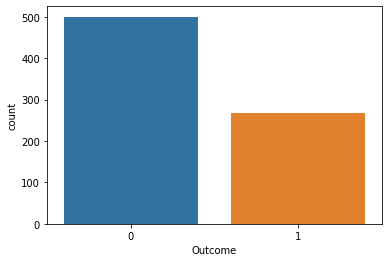

In [6]:
sns.countplot(x="Outcome", data=df)
plt.show()

Давайте посмотрим на средние значения Outcome по каждому из признаков:

In [7]:
def show_corr(col: str):
    plt.scatter(df.sort_values(col)[col].unique(), df.groupby(col).mean()['Outcome'])
    plt.show()

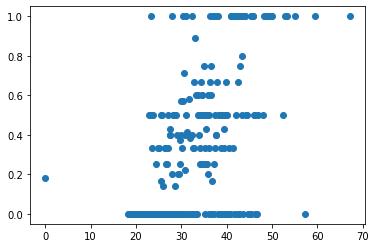

In [8]:
show_corr("BMI")

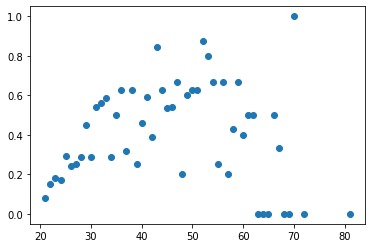

In [9]:
show_corr("Age")

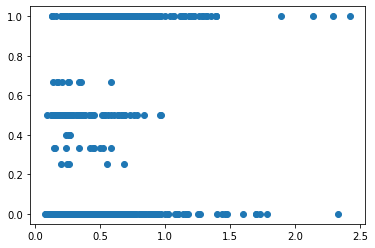

In [10]:
show_corr("DiabetesPedigreeFunction")

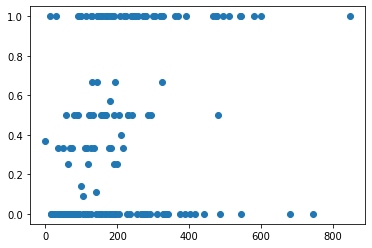

In [11]:
show_corr("Insulin")

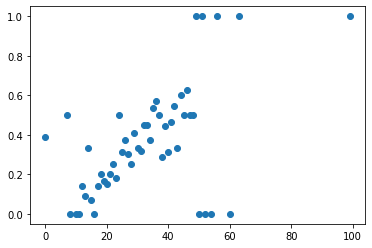

In [12]:
show_corr("SkinThickness")

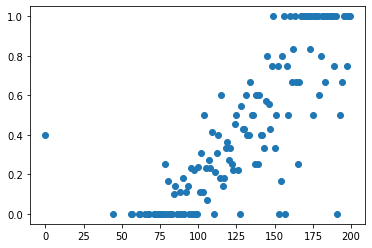

In [13]:
show_corr("Glucose")

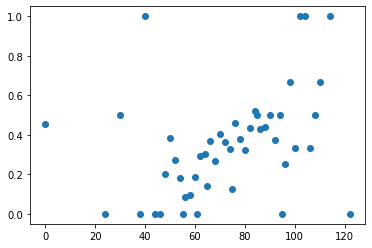

In [14]:
show_corr("BloodPressure")

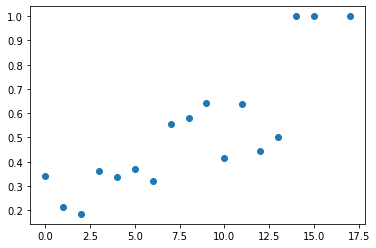

In [15]:
show_corr("Pregnancies")

Если приглядеться, то можно увидеть, что Insulin, BMI и DiabetesPedigreeFunction имеют посредственную корреляцию, тогда как остальные признаки показывают явные линейные зависимости, мб линейный классификатор хорошо сработает

BMI все-таки попробуем не убирать, посмотрим, что сможем с ним сделать:

### Создание нового признака

Судя по всему, переедание и возраст сильно влияют на исход. Создадим новый признак:

In [16]:
df["OldAndOverweight"] = 0
'''
Недостаточный вес: ИМТ менее 18,5. Нормальный вес: ИМТ от 18,5 до 24,9. Избыточный вес: ИМТ от 25 до 29,9. Ожирение: ИМТ от 30 и выше.
'''
df.loc[(df['Age'] > 50) & (df['BMI'] > 30), 'OldAndOverweight'] = 1

In [17]:
df["OldAndOverweight"].value_counts()

0    725
1     43
Name: OldAndOverweight, dtype: int64

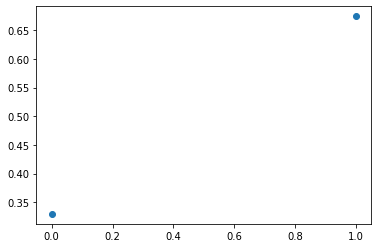

In [18]:
show_corr("OldAndOverweight")

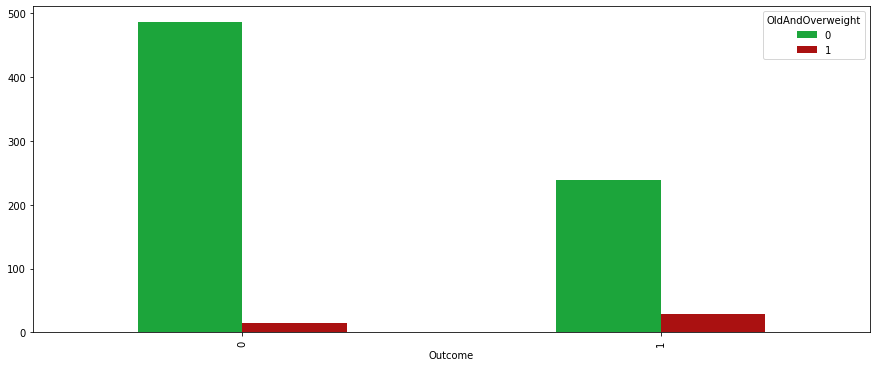

In [19]:
pd.crosstab(df.Outcome,df.OldAndOverweight).plot(kind="bar", figsize=(15, 6), color=['#1CA53B', '#AA1111' ])
plt.show()

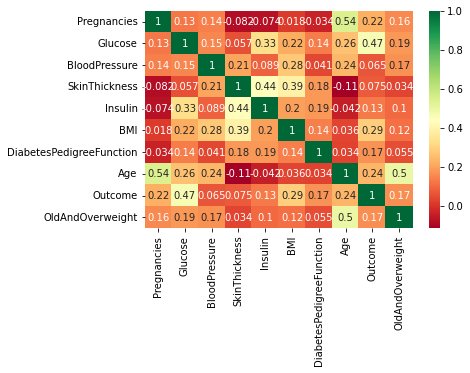

In [20]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.show()

Признак оказался неудачным, тогда просто уберем его из выборки заодно с остальными некритичными

In [21]:
df.drop(["Insulin", "BMI", "DiabetesPedigreeFunction", "OldAndOverweight"], axis=1, inplace=True)

In [22]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Age,Outcome
0,6,148,72,35,50,1
1,1,85,66,29,31,0
2,8,183,64,0,32,1
3,1,89,66,23,21,0
4,0,137,40,35,33,1


### Преобразование категориальных признаков

Осуществлять не требуется, датасет уже чистый и приятный

## Разбиение данных с использованием train_test_split и масштабирование

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

y = df['Outcome']
X = df.drop(columns=['Outcome'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train)

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test)

accuracies = {}

### K-Nearest Neighbour

In [24]:
from knn import KNN
from sklearn.model_selection import GridSearchCV


k_grid = list([1, 2, 5, 10, 15, 20, 25])
p_minkowski_grid = list(range(1, 7))

knn_searcher = GridSearchCV(
    estimator=KNN(),
    param_grid=[{"k": k_grid, "p_minkowski": p_minkowski_grid}],
    cv=5
)
knn_tuned = {'k': 25, 'p_minkowski': 2}
if knn_tuned == None:
  knn_searcher.fit(X_train_scaled, y_train)
  print(knn_searcher.best_params_) # {'k': 25, 'p_minkowski': 2}


{'k': 25, 'p_minkowski': 2}


In [31]:
knn = KNN(k=25, p_minkowski=2)
knn.fit(X_train_scaled, y_train)

knn_accuracy = knn.score(X_test_scaled, y_test)
accuracies["KNN"] = knn_accuracy
print(f"KNN Test Accuracy {knn_accuracy}")

KNN Test Accuracy 0.7337662337662337


built-in:

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


leaf_size_grid = list(range(1,50))
n_neighbors_grid = list(range(1,30))
p_grid=[1,2]

builtin_knn_searcher = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=[{"leaf_size": leaf_size_grid, "n_neighbors": n_neighbors_grid, "p": p_grid}],
    cv=5
)
builtin_knn_tuned = None
if builtin_knn_tuned == None:
  builtin_knn_searcher.fit(X_train_scaled, y_train)
  print(builtin_knn_searcher.best_params_) # {'leaf_size': 1, 'n_neighbors': 26, 'p': 1}

{'leaf_size': 1, 'n_neighbors': 26, 'p': 1}


In [32]:
builtin_knn = KNeighborsClassifier(leaf_size=1, n_neighbors=26, p=1)
builtin_knn.fit(X_train_scaled, y_train)

builtin_knn_accuracy = builtin_knn.score(X_test_scaled, y_test)
accuracies["Built-in KNN"] = builtin_knn_accuracy
print(f"Built-in KNN Test Accuracy {builtin_knn_accuracy}")

Built-in KNN Test Accuracy 0.7532467532467533


## Decision Tree

In [26]:
from sklearn.model_selection import GridSearchCV
from decision_tree import DTC


max_depth_grid = list(range(3, 40))
min_samples_split_grid = [5, 10, 20, 50, 100]

dtc_searcher = GridSearchCV(
    estimator=DTC(),
    param_grid=[{"max_depth": max_depth_grid, "min_samples_split": min_samples_split_grid}],
    cv=5
)
dtc_tuned = None
if dtc_tuned == None:
  dtc_searcher.fit(X_train, y_train)
  print(dtc_searcher.best_params_) # {'max_depth': 7, 'min_samples_split': 100}


{'max_depth': 7, 'min_samples_split': 100}


In [33]:
dtc = DTC(max_depth=7, min_samples_split=100)
dtc.fit(X_train, y_train)

acc = dtc.score(X_test, y_test)
accuracies['Decision Tree'] = acc
print(f"Decision Tree Test Accuracy {acc}")

Decision Tree Test Accuracy 0.6948051948051948


built-in:

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

max_depth_grid = list(range(3, 40))
min_samples_split_grid = [5, 10, 20, 50, 100]
criterion_grid = ["gini", "entropy"]

builtin_dtc_searcher = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=[{"max_depth": max_depth_grid, "min_samples_split": min_samples_split_grid, "criterion": criterion_grid}],
    cv=5
)
builtin_dtc_tuned = None
if builtin_dtc_tuned == None:
  builtin_dtc_searcher.fit(X_train, y_train)
  print(builtin_dtc_searcher.best_params_) # {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 100}


{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 100}


In [34]:
builtin_dtc = sklearn.tree.DecisionTreeClassifier(criterion="gini", max_depth=7, min_samples_split=100)
builtin_dtc.fit(X_train, y_train)

acc = builtin_dtc.score(X_test, y_test)
accuracies['Built-in Decision Tree'] = acc
print(f"Built-int Decision Tree Test Accuracy {acc}")

Built-int Decision Tree Test Accuracy 0.6623376623376623


### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

max_depth_grid = list(range(3, 40))
min_samples_split_grid = list(range(1, 7))

solver_grid = ['newton-cg', 'lbfgs', 'liblinear']
penalty_grid = ['none', 'l1', 'l2', 'elasticnet']
C_grid = [100, 10, 1.0, 0.1, 0.01]

lr_searcher = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=[{"solver": solver_grid, "penalty": penalty_grid, "C": C_grid}],
    cv=5
)
lr_tuned = None
if lr_tuned == None:
  lr_searcher.fit(X_train_scaled, y_train)
  print(lr_searcher.best_params_) # {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [35]:
lr = LogisticRegression(C=0.1, penalty="l2", solver="newton-cg")
lr.fit(X_train_scaled, y_train)

acc = lr.score(X_test_scaled, y_test)
accuracies['Logistic Regression'] = acc
print(f"Logistic Regression Test Accuracy {acc}")

Logistic Regression Test Accuracy 0.7467532467532467


### SVC

In [29]:
from sklearn.svm import SVC


C_grid = [0.1,1, 10, 100]
gamma_grid = [1,0.1,0.01,0.001]
kernel_grid = ['rbf', 'poly', 'sigmoid']

svc_searcher = GridSearchCV(
    estimator=SVC(),
    param_grid=[{'C': C_grid, 'gamma': gamma_grid, 'kernel': kernel_grid}],
    cv=5
)
svc_tuned = None
if svc_tuned == None:
  svc_searcher.fit(X_train_scaled, y_train)
  print(svc_searcher.best_params_) # {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [36]:
svc = SVC(C=0.1, gamma=0.1, kernel='rbf')
svc.fit(X_train_scaled, y_train)

acc = svc.score(X_test_scaled, y_test)
accuracies['SVC'] = acc
print(f"SVC Test Accuracy {acc}")

SVC Test Accuracy 0.7532467532467533


### Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

bayes_searcher = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=[{'var_smoothing': np.logspace(0,-9, num=100)}],
    cv=5
)
bayes_tuned = None
if bayes_tuned == None:
  bayes_searcher.fit(X_train_scaled, y_train)
  print(bayes_searcher.best_params_) # {'var_smoothing': 0.12328467394420659}


{'var_smoothing': 0.12328467394420659}


In [37]:
bayes = GaussianNB(var_smoothing=0.12328467394420659)
bayes.fit(X_train_scaled, y_train)

acc = bayes.score(X_test_scaled, y_test)
accuracies['Naive Bayes'] = acc
print(f"Naive Bayes Test Accuracy {acc}")

Naive Bayes Test Accuracy 0.7467532467532467


## Comparing Models

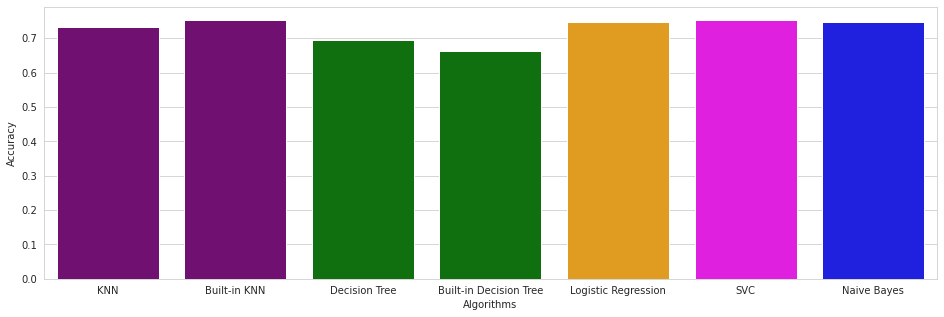

In [38]:
colors = ["purple", "purple", "green", "green", "orange", "magenta", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16, 5))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.ylabel("Accuracy")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

## Confusion Matrix

In [39]:
# Predicted values

y_head_knn = knn.predict(X_test_scaled)
y_head_builtin_knn = builtin_knn.predict(X_test_scaled)
y_head_dtc = dtc.predict(X_test)
y_head_builtin_dtc = builtin_dtc.predict(X_test)
y_head_lr = lr.predict(X_test_scaled)
y_head_svm = svc.predict(X_test_scaled)
y_head_bayes = bayes.predict(X_test_scaled)


In [40]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_head_knn)
cm_b_knn = confusion_matrix(y_test, y_head_builtin_knn)
cm_dtc = confusion_matrix(y_test, y_head_dtc)
cm_b_dtc = confusion_matrix(y_test, y_head_builtin_dtc)
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_bayes = confusion_matrix(y_test, y_head_bayes)


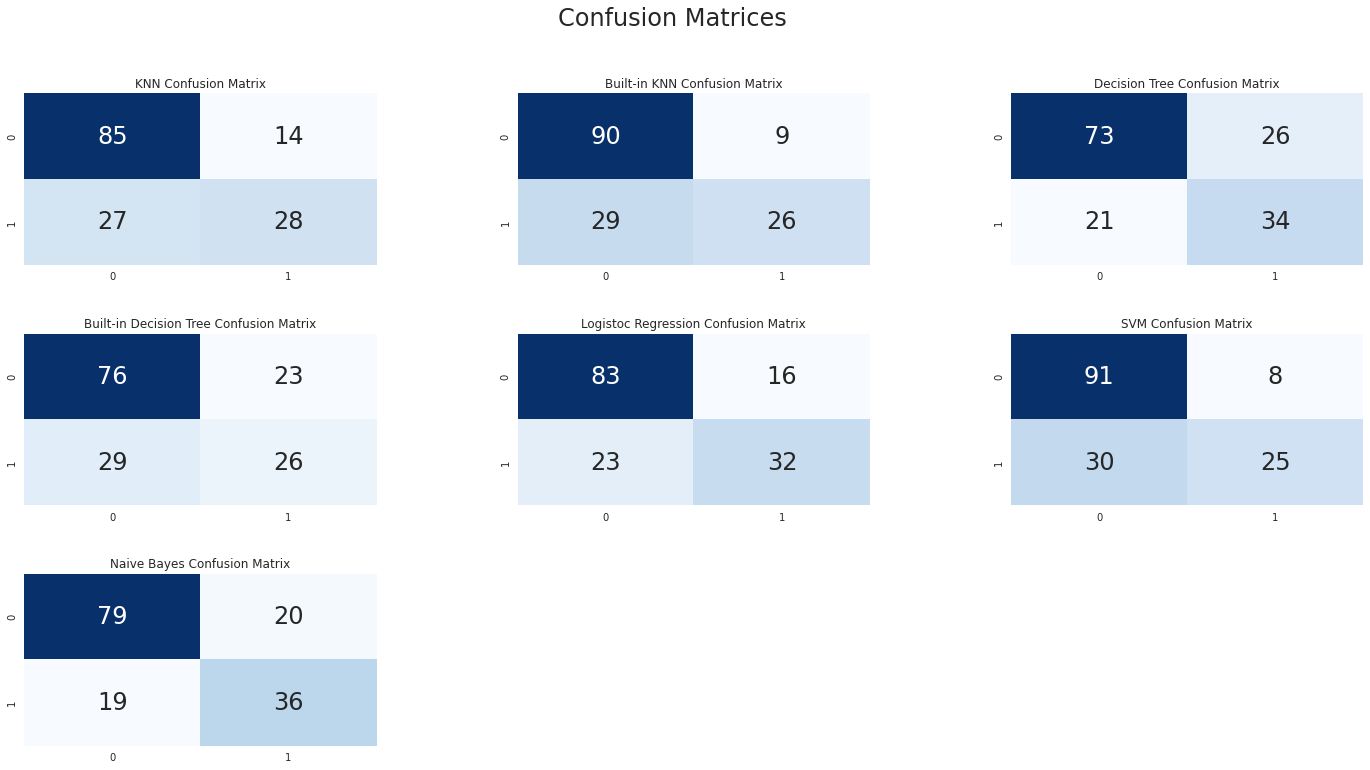

In [41]:
plt.figure(figsize=(24, 12))

plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

cm = " Confusion Matrix"

plt.subplot(3,3,1)
plt.title("KNN" + cm)
sns.heatmap(cm_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,2)
plt.title("Built-in KNN" + cm)
sns.heatmap(cm_b_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,3)
plt.title("Decision Tree" + cm)
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,4)
plt.title("Built-in Decision Tree" + cm)
sns.heatmap(cm_b_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,5)
plt.title("Logistoc Regression" + cm)
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,6)
plt.title("SVM" + cm)
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(3,3,7)
plt.title("Naive Bayes" + cm)
sns.heatmap(cm_bayes,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Вывод
1. На этот раз оказалось, что написанный DecisionTree работает лучше, чем встроенный. Возможно из-за слишком малого количества параметров для оптимизации, возможно случайно. Встроенный KNN все еще обгоняет написанный;
2. На этот раз самым большим количеством ложно-положительных результатов на confusion-матрице показал DecisionTree. Возможно, из-за гиперпараметров. Да и в целом FP и FN результатов стало больше, вероятно зависимости сложные, не дают однозначно классифицировать субъекты;
3. Лучше всего на этой задаче себя показывают KNN и SVM и ожидаемо логистическая регрессия.